1. Celem analizy jest zdefiniowanie modelu klasyfikacyjnego dla zbioru danych iris oraz ocena jego jakości.
2. Zmiennymi objaśniającymi są 'sepal_length ', 'sepal_width' , 'petal_length' , 'petal_width' , natomiast zmienną zależną jest 'species',

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data

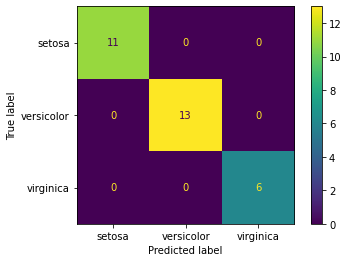

----------------------------------------------
----------------Cross-validation--------------
Accuracy:  [1.         1.         0.96666667 0.93333333 1.        ]
Accuracy (mean):  0.9800000000000001
Accuracy (std):  0.02666666666666666


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import describe
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split, cross_val_score

plt.close('all')

df = sns.load_dataset("iris") 
print(df.head())
print(df.describe())
print(df.info())

X=df.values[:,:4]
y=df.values[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#walidacja prosta z kwadratową dyskryminacją
da=QuadraticDiscriminantAnalysis() #QDA
da.fit(X_train, y_train)
y_pred = da.predict(X_test) 
print('-------------------Simple validation----------------------')
print('\nAccuracy (test):', accuracy_score(y_test, y_pred))
print('Precision (test):', precision_score(y_test, y_pred, average='micro')) 
print('Recall (test):', recall_score(y_test, y_pred,average='micro')) 
print('F1 (test):', f1_score(y_test, y_pred,average='micro'), '\n') 
y_train_pred = da.predict(X_train)
print('\nAccuracy (train):', accuracy_score(y_train, y_train_pred))
print('Precision (train):', precision_score(y_train, y_train_pred,average='micro')) 
print('Recall (train):', recall_score(y_train, y_train_pred,average='micro')) 
print('F1 (train):', f1_score(y_train, y_train_pred,average='micro'), '\n') 

labels=np.unique(y)
print("\nClassification report for simple validation:\n",classification_report(y_test, y_pred, labels=labels))

print('\nConfusion matrix')
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred) 
print(pd.DataFrame(cm, index=labels, columns=labels))

print('\nConfusion matrix - plot') 
pcm = plot_confusion_matrix(da, X_test, y_test, labels=labels) 
ConfusionMatrixDisplay(pcm, display_labels=labels) 
plt.show() 
print("----------------------------------------------")
print("----------------Cross-validation--------------")
scores=cross_val_score(da, X, y, cv=5)
print('Accuracy: ',scores) 
print('Accuracy (mean): ', scores.mean()) 
print('Accuracy (std): ', scores.std())

  Zdefiniowano model za pomocą QDA i dobrano rozmiar zbioru testowego na 0.2. Wtedy to wartość dokładności (jak i innych współczynników) dla zbioru testowego wyniosła 1 a dla treningowego 0.975 co było prawdopodobnie najbardziej optymalnym rozwiązaniem. 
Dla walidacji krzyżowej najlepsze wyniki przynosi podział na 5 podzbiorów.
  Prosta walidacja okazuje się skuteczna do odpowiedniego wytrenowania modelu - jego dokładność dla zbioru testowego wynosi aż 1, natomiast dokładność dla treningowego jest na zadowalającym poziomie. Średnia dokładności przy walidacji krzyżowej wskazuje na bardzo dobre właściwości predykcyjne. Obydwa modele mają zadowalające własności dla wykorzystanego zbioru danych.

**Stanisław Kaczmarski**